### Research Questoin: What makes influencers intersting for their followers?

This work is part of the above research question.

In [214]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [215]:
df_instagram = pd.read_csv('data/social_media_influencers_instagram.csv')

# 1) Understanding Data

In [216]:
print(df_instagram.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB
None


In [217]:
print(df_instagram.columns)

Index(['Influencer insta name', 'instagram name', 'category_1', 'category_2',
       'Followers', 'Audience country(mostly)', 'Authentic engagement\r\n',
       'Engagement avg\r\n'],
      dtype='object')


In [218]:
df_instagram.rename(columns={'Influencer insta name':'influencer_insta_name', 
                             'instagram name':'insta_name',
                             'Followers':'followers', 
                             'Audience country(mostly)': 'majority_country',
                             'Authentic engagement\r\n':'authentic_engagement', 
                             'Engagement avg\r\n':'average_engagement'}, inplace=True)

In [219]:
print(df_instagram.columns)

Index(['influencer_insta_name', 'insta_name', 'category_1', 'category_2',
       'followers', 'majority_country', 'authentic_engagement',
       'average_engagement'],
      dtype='object')


In [220]:
df_instagram.describe()

,influencer_insta_name,insta_name,category_1,category_2,followers,majority_country,authentic_engagement,average_engagement
count,1000,979,892,287,1000,986,1000,1000
unique,997,975,31,27,411,32,850,778
top,angelinajolie,Bruno Goes 🎭,Music,Cinema & Actors/actresses,6M,United States,1.1M,1.1M
freq,2,2,235,59,11,279,22,28


In [221]:
df_instagram.head()

,influencer_insta_name,insta_name,category_1,category_2,followers,majority_country,authentic_engagement,average_engagement
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [222]:
df_instagram.groupby('category_1').count()

,influencer_insta_name,insta_name,category_2,followers,majority_country,authentic_engagement,average_engagement
category_1,,,,,,,
Accessories & Jewellery,1,1,1,1,1,1,1
Adult content,6,6,0,6,6,6,6
Animals,1,1,0,1,1,1,1
Art/Artists,12,12,9,12,12,12,12
Beauty,28,27,12,28,28,28,28
Business & Careers,4,4,0,4,4,4,4
Cars & Motorbikes,5,5,3,5,5,5,5
Cinema & Actors/actresses,214,210,51,214,214,214,214
Clothing & Outfits,5,5,4,5,5,5,5


In [223]:
df_instagram['category_1'].value_counts()

Music                        235
Cinema & Actors/actresses    214
Sports with a ball           113
Lifestyle                     99
Shows                         43
Modeling                      36
Beauty                        28
Humor & Fun & Happiness       18
Art/Artists                   12
Family                        11
Fitness & Gym                 10
Fashion                        9
Computers & Gadgets            9
Racing Sports                  7
Adult content                  6
Cars & Motorbikes              5
Finance & Economics            5
Clothing & Outfits             5
Photography                    4
Business & Careers             4
Food & Cooking                 3
Literature & Journalism        3
Nature & landscapes            3
Management & Marketing         2
Science                        2
Animals                        1
Accessories & Jewellery        1
Education                      1
Luxury                         1
Machinery & Technologies       1
Kids & Toy

In [224]:
df_instagram_category1 = df_instagram['category_1'].value_counts().rename_axis('unique_categories').reset_index(name='category_counts')
df_instagram_category1

,unique_categories,category_counts
0,Music,235
1,Cinema & Actors/actresses,214
2,Sports with a ball,113
3,Lifestyle,99
4,Shows,43
5,Modeling,36
6,Beauty,28
7,Humor & Fun & Happiness,18
8,Art/Artists,12
9,Family,11


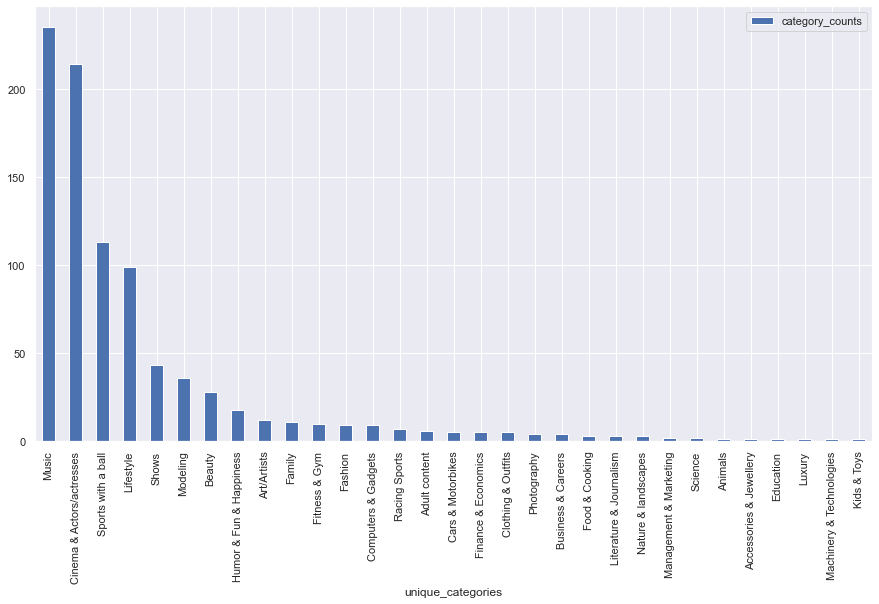

In [225]:
df_instagram_category1.plot.bar(x='unique_categories', y='category_counts', rot=90, figsize=(15,8))

In [226]:
df_instagram['category_1'].describe()

count       892
unique       31
top       Music
freq        235
Name: category_1, dtype: object

In [227]:
df_instagram.groupby('category_2').count()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
category_2,,,,,,,
Adult content,1,1,1,1,1,1,1
Art/Artists,17,17,17,17,17,17,17
Beauty,12,11,12,12,12,12,12
Business & Careers,6,6,6,6,6,6,6
Cars & Motorbikes,1,1,1,1,1,1,1
Cinema & Actors/actresses,59,59,59,59,59,59,59
Clothing & Outfits,5,5,5,5,5,5,5
Comics & sketches,2,2,2,2,2,2,2
Computers & Gadgets,1,1,1,1,0,1,1


In [228]:
df_instagram['category_2'].value_counts()

Cinema & Actors/actresses    59
Lifestyle                    55
Modeling                     30
Fashion                      18
Art/Artists                  17
Shows                        16
Music                        15
Beauty                       12
Family                       10
Humor & Fun & Happiness      10
Sports with a ball            6
Photography                   6
Business & Careers            6
Clothing & Outfits            5
Machinery & Technologies      5
Luxury                        3
Shopping & Retail             2
Comics & sketches             2
Fitness & Gym                 2
Literature & Journalism       1
Trainers & Coaches            1
Finance & Economics           1
Cars & Motorbikes             1
Adult content                 1
Science                       1
Kids & Toys                   1
Computers & Gadgets           1
Name: category_2, dtype: int64

In [229]:
df_instagram_category2 = df_instagram['category_2'].value_counts().rename_axis('unique_categories').reset_index(name='category_counts')
df_instagram_category2

,unique_categories,category_counts
0,Cinema & Actors/actresses,59
1,Lifestyle,55
2,Modeling,30
3,Fashion,18
4,Art/Artists,17
5,Shows,16
6,Music,15
7,Beauty,12
8,Family,10
9,Humor & Fun & Happiness,10


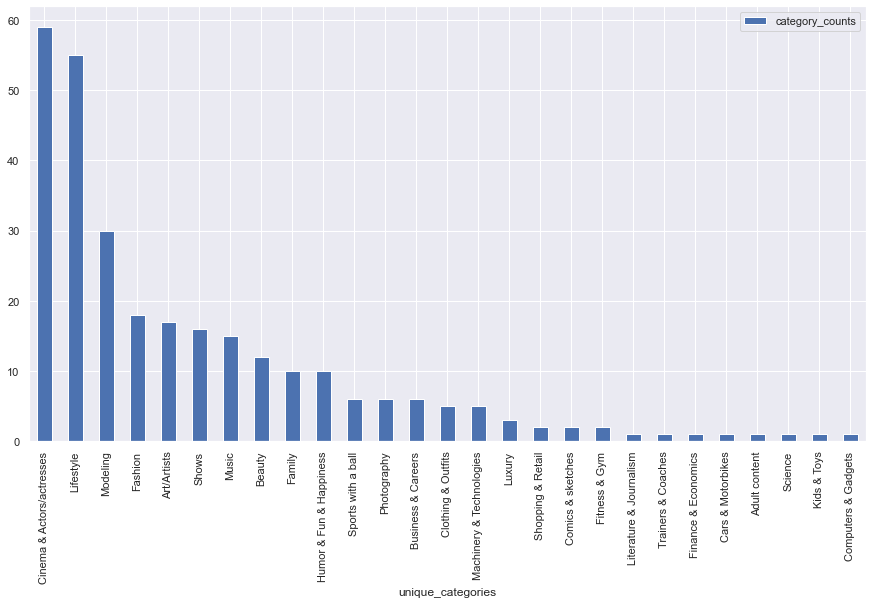

In [230]:
df_instagram_category2.plot.bar(x='unique_categories', y='category_counts', rot=90, figsize=(15,8))

In [231]:
df_instagram['category_2'].describe()

count                           287
unique                           27
top       Cinema & Actors/actresses
freq                             59
Name: category_2, dtype: object

In [232]:
df_instagram[df_instagram['category_1'].notna()].count()

influencer_insta_name    892
insta_name               875
category_1               892
category_2               287
followers                892
majority_country         889
authentic_engagement     892
average_engagement       892
dtype: int64

In [233]:
df_instagram[df_instagram['category_2'].notna()].count()

influencer_insta_name    287
insta_name               284
category_1               287
category_2               287
followers                287
majority_country         285
authentic_engagement     287
average_engagement       287
dtype: int64

# 2) Handling Missing Data

In [234]:
# We check whether there is any NaN in our dataset.

df_instagram.isna().any()

influencer_insta_name    False
insta_name                True
category_1                True
category_2                True
followers                False
majority_country          True
authentic_engagement     False
average_engagement       False
dtype: bool

In [235]:
# We check whether there is any row that has a not NaN value in 'category_2' column and a NaN value
# in 'category_1' column.
# There is no such row.

df_instagram[df_instagram.category_1.isnull() & df_instagram.category_2.notnull()]

,influencer_insta_name,insta_name,category_1,category_2,followers,majority_country,authentic_engagement,average_engagement


In [236]:
# We remove category_2 column since it can not help us to identify anything specific about the rows. Only 287 rows 
# have non-NaN values out of 1000 rows.

df_instagram_imputed = df_instagram.drop('category_2', axis=1)

In [237]:
df_instagram_imputed.insta_name.duplicated().value_counts()

False    976
True      24
Name: insta_name, dtype: int64

In [238]:
df_instagram_imputed[df_instagram_imputed.insta_name.duplicated()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
23,addisonraee,NaN,Beauty,40.5M,United States,1.1M,1.6M
26,adinross,NaN,NaN,2.6M,United States,551.1K,1.1M
34,alexademie,NaN,NaN,10.8M,United States,1.2M,2.1M
51,amandamanopo,NaN,Modeling,15.2M,Indonesia,189.6K,250.5K
64,angelinajolie,Angelina Jolie,Lifestyle,12.6M,Brazil,274.6K,456.1K
110,badbunnypr,NaN,Music,38.5M,United States,2.5M,3.9M
250,dominicfike,NaN,NaN,3.7M,United States,419.9K,799K
275,emilia_clarke,NaN,Cinema & Actors/actresses,27M,India,490.5K,617.2K
319,ggonekim,NaN,NaN,5.1M,Indonesia,441.6K,542.6K
345,harrystyles,NaN,Music,43.3M,Brazil,2.9M,3.9M


In [239]:
df_instagram_imputed.influencer_insta_name.duplicated().value_counts()

False    997
True       3
Name: influencer_insta_name, dtype: int64

In [240]:
df_instagram_imputed.insta_name.notna().sum()

979

In [241]:
# The difference between not NaN and number of duplicated values of the the columns 'insta_name' tells us there are
# a few influencers whose rows are duplicated.

df_instagram_imputed.insta_name.unique().size

976

In [242]:
# The following shows, there are three influencers who have one duplicated row.
# In the following lines, we look into the data to decide which row we need to remove.

df_instagram_imputed[df_instagram_imputed.influencer_insta_name.duplicated()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
64,angelinajolie,Angelina Jolie,Lifestyle,12.6M,Brazil,274.6K,456.1K
459,justinbieber,Justin Bieber,Music,227.4M,India,314.2K,445.3K
693,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.1K


In [243]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'nobru']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
692,nobru,Bruno Goes 🎭,NaN,13.2M,NaN,0,350.2K
693,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.1K


In [244]:
# We also impute the NaN value in 'category_1' column based on the other row not missing this value.

source_index = df_instagram_imputed[(df_instagram_imputed['influencer_insta_name'] == 'nobru') & 
                                    (df_instagram_imputed['category_1'].notnull())].index

target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'nobru') & 
                                        (df_instagram_imputed['category_1'].isnull())].index

df_instagram_imputed.loc[target_index, 'category_1'] = df_instagram_imputed.iloc[source_index]['category_1'].tolist()[0]

In [245]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'nobru']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
692,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.2K
693,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.1K


In [246]:
# We keep the row with higher 'average_engagement' value, and we drop the other row.

df_instagram_imputed.drop(index=source_index, axis=0, inplace=True)

df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'nobru']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
692,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.2K


In [247]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'justinbieber']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
458,justinbieber,Justin Bieber,Music,227M,India,439.1K,638.2K
459,justinbieber,Justin Bieber,Music,227.4M,India,314.2K,445.3K


In [248]:
# We keep the row with higher 'average_engagement' value and we drop the other row.

target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'justinbieber') & 
                                        (df_instagram_imputed['average_engagement'] == '445.3K')].index

df_instagram_imputed.drop(index=target_index, axis=0, inplace=True)

df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'justinbieber']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
458,justinbieber,Justin Bieber,Music,227M,India,439.1K,638.2K


In [249]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'angelinajolie']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
63,angelinajolie,Angelina Jolie,NaN,12.6M,Brazil,274.6K,456.2K
64,angelinajolie,Angelina Jolie,Lifestyle,12.6M,Brazil,274.6K,456.1K


In [250]:
# We also impute the NaN value in 'category_1' column based on the other row not missing this value.

source_index = df_instagram_imputed[(df_instagram_imputed['influencer_insta_name'] == 'angelinajolie') & 
                                    (df_instagram_imputed['category_1'].notnull())].index

target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'angelinajolie') & 
                                        (df_instagram_imputed['category_1'].isnull())].index

df_instagram_imputed.loc[target_index, 'category_1'] = df_instagram_imputed.iloc[source_index]['category_1'].tolist()[0]

In [251]:
# We keep the row with higher 'average_engagement' value, and we drop the other row.

df_instagram_imputed.drop(index=source_index, axis=0, inplace=True)

df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'angelinajolie']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
63,angelinajolie,Angelina Jolie,Lifestyle,12.6M,Brazil,274.6K,456.2K


In [252]:
df_instagram_imputed.insta_name.notna().sum()

976

In [253]:
# We check to make sure the discrepency between not NaN values and unique rows in 'insta_name' column is resolved.

df_instagram_imputed.insta_name.unique().size

976

In [254]:
df_instagram_imputed[df_instagram_imputed.insta_name.duplicated()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
23,addisonraee,NaN,Beauty,40.5M,United States,1.1M,1.6M
26,adinross,NaN,NaN,2.6M,United States,551.1K,1.1M
34,alexademie,NaN,NaN,10.8M,United States,1.2M,2.1M
51,amandamanopo,NaN,Modeling,15.2M,Indonesia,189.6K,250.5K
110,badbunnypr,NaN,Music,38.5M,United States,2.5M,3.9M
250,dominicfike,NaN,NaN,3.7M,United States,419.9K,799K
275,emilia_clarke,NaN,Cinema & Actors/actresses,27M,India,490.5K,617.2K
319,ggonekim,NaN,NaN,5.1M,Indonesia,441.6K,542.6K
345,harrystyles,NaN,Music,43.3M,Brazil,2.9M,3.9M
354,hichasestokes,NaN,Lifestyle,7.4M,United States,640.9K,959.8K


In [255]:
# Here, although the 'insta_name's column value looks duplicated, the following two rows belong to two different
# accounts.

df_instagram_imputed[df_instagram_imputed['insta_name'] == '김민규']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
633,min9yu_k,김민규,Music,6M,Indonesia,1.1M,1.3M
634,mingue.k,김민규,Shows,3.3M,Indonesia,893.5K,1.1M


In [256]:
# We check whether there are rows with NaN values in both of the 'influencer_insta_name' and 'insta_name' 
# columns. We do this to make sure we can identify the influencer based on at least one of these names.
# There is no such a row.

df_instagram_imputed[df_instagram_imputed.influencer_insta_name.isnull() & 
                     df_instagram_imputed.insta_name.isnull()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement


In [257]:
# We identify the number of rows including NaN values in the 'category_1' column and drop all of these rows.

len(df_instagram_imputed[df_instagram_imputed['category_1'].isnull()])

106

In [258]:
df_instagram_imputed.drop(df_instagram_imputed[df_instagram_imputed['category_1'].isnull()].index, axis=0, inplace=True)
df_instagram_imputed

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
0,433,433,Sports with a ball,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,13.5M,Indonesia,1.1M,1.4M
6,_rl9,Robert Lewandowski,Sports with a ball,25M,Poland,588.6K,749K
...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,8.2M,United States,583K,885.5K


In [259]:
len(df_instagram_imputed[df_instagram_imputed['category_1'].isnull()])

0

In [260]:
df_instagram_imputed.isnull().sum()

influencer_insta_name     0
insta_name               17
category_1                0
followers                 0
majority_country          3
authentic_engagement      0
average_engagement        0
dtype: int64

In [261]:
# The only remaining column with NaN values to investigate is 'majority_country' column with three NaN values.

df_instagram_imputed[df_instagram_imputed.majority_country.isnull()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
258,dukeandduchessofcambridge,Duke and Duchess of Cambridge,Family,13.5M,NaN,0,214.2K
445,joshu_acoustic,Joshua Hong,Music,4M,NaN,0,1M
692,nobru,Bruno Goes 🎭,Machinery & Technologies,13.2M,NaN,0,350.2K


In [262]:
df_instagram_imputed[df_instagram_imputed.influencer_insta_name == 'dukeandduchessofcambridge']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
258,dukeandduchessofcambridge,Duke and Duchess of Cambridge,Family,13.5M,NaN,0,214.2K


In [263]:
# We query which countries all of these influencers are coming from.

df_instagram_imputed.majority_country.unique()

array(['Spain', 'Indonesia', 'Russia', 'Poland', 'South Korea',
       'United States', 'Thailand', 'India', 'Iraq', 'Morocco', 'Turkey',
       'Mexico', 'Brazil', 'Chile', 'Iran', 'Italy', 'Colombia',
       'Argentina', 'Philippines', 'United Kingdom', 'Germany', 'Nigeria',
       'Serbia', nan, 'Albania', 'United Arab Emirates', 'China',
       'France', 'Japan', 'Egypt', 'Syria', 'Algeria', 'Ukraine'],
      dtype=object)

In [264]:
# We found where are these three influencers coming from by searching online using Instagram.

target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'dukeandduchessofcambridge') & 
                                        (df_instagram_imputed['majority_country'].isnull())].index

df_instagram_imputed.loc[target_index, 'majority_country'] = 'United Kingdom'

In [265]:
target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'joshu_acoustic') & 
                                        (df_instagram_imputed['majority_country'].isnull())].index

df_instagram_imputed.loc[target_index, 'majority_country'] = 'South Korea'

In [266]:
target_index = df_instagram_imputed.loc[(df_instagram_imputed['influencer_insta_name'] == 'nobru') & 
                                        (df_instagram_imputed['majority_country'].isnull())].index

df_instagram_imputed.loc[target_index, 'majority_country'] = 'Brazil'

In [267]:
# We check to see whether the NaN values in 'majority_country' column are gone.

df_instagram_imputed[df_instagram_imputed.majority_country.isnull()]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement


In [268]:
# We double check the number of NaNs again.
# Reminder: We decided to keep 17 NaN values in 'insta_name' column.

df_instagram_imputed.isnull().sum()

influencer_insta_name     0
insta_name               17
category_1                0
followers                 0
majority_country          0
authentic_engagement      0
average_engagement        0
dtype: int64

In [269]:
# We check two remaining columns including 'authentic_engagement' and 'average_engagement' columns for NaN values.

df_instagram_imputed.authentic_engagement.isnull().sum()

0

In [270]:
df_instagram_imputed.average_engagement.isnull().sum()

0

In [271]:
# We check the value type of the elements in 'authentic_engagement' column.

#with pd.option_context('display.max_rows', None):
print(df_instagram_imputed['authentic_engagement'])

0      383.1K
1        478K
2      310.8K
3        1.1M
6      588.6K
        ...  
995      6.4M
996      546K
997      1.3M
998      583K
999    208.7K
Name: authentic_engagement, Length: 891, dtype: object


In [272]:
# We convert string values (ending with 'K' and 'M') to float values in 'authentic_engagement' column.

df_instagram_imputed['authentic_engagement'] = [round(float(engagement_rate[:-1])*1000, 2)
                                                if 'K' in engagement_rate 
                                                else round(float(engagement_rate[:-1])*1000000, 2)
                                                if 'M' in engagement_rate 
                                                else engagement_rate
                                                for engagement_rate in df_instagram_imputed['authentic_engagement']]

In [273]:
#with pd.option_context('display.max_rows', None):
print(df_instagram_imputed['authentic_engagement'])

0       383100.0
1       478000.0
2       310800.0
3      1100000.0
6       588600.0
         ...    
995    6400000.0
996     546000.0
997    1300000.0
998     583000.0
999     208700.0
Name: authentic_engagement, Length: 891, dtype: object


In [274]:
# We check the value type of the elements in 'average_engagement' column.

#with pd.option_context('display.max_rows', None):
print(df_instagram_imputed['average_engagement'])

0        637K
1      542.3K
2      377.9K
3        1.4M
6        749K
        ...  
995      8.6M
996    744.1K
997      1.6M
998    885.5K
999    289.3K
Name: average_engagement, Length: 891, dtype: object


In [275]:
# We convert string values (ending with 'K' and 'M') to float values in 'average_engagement' column.

df_instagram_imputed['average_engagement'] = [round(float(average_engagement[:-1])*1000, 2)
                                                if 'K' in average_engagement 
                                                else round(float(average_engagement[:-1])*1000000, 2)
                                                if 'M' in average_engagement 
                                                else average_engagement
                                                for average_engagement in df_instagram_imputed['average_engagement']]

In [276]:
#with pd.option_context('display.max_rows', None):
print(df_instagram_imputed['average_engagement'])

0       637000.0
1       542300.0
2       377900.0
3      1400000.0
6       749000.0
         ...    
995    8600000.0
996     744100.0
997    1600000.0
998     885500.0
999     289300.0
Name: average_engagement, Length: 891, dtype: float64


In [277]:
df_instagram_imputed

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
0,433,433,Sports with a ball,48.5M,Spain,383100.0,637000.0
1,__youngbae__,TAEYANG,Music,12.7M,Indonesia,478000.0,542300.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18.8M,Russia,310800.0,377900.0
3,_imyour_joy,Joy,Lifestyle,13.5M,Indonesia,1100000.0,1400000.0
6,_rl9,Robert Lewandowski,Sports with a ball,25M,Poland,588600.0,749000.0
...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,136.1M,United States,6400000.0,8600000.0
996,zidane,zidane,Sports with a ball,31.2M,Spain,546000.0,744100.0
997,zkdlin,KAI,Music,13.9M,Indonesia,1300000.0,1600000.0
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,8.2M,United States,583000.0,885500.0


In [278]:
# We check the value type of the elements in 'followers' column.

#with pd.option_context('display.max_rows', None):
print(df_instagram_imputed['followers'])

0       48.5M
1       12.7M
2       18.8M
3       13.5M
6         25M
        ...  
995    136.1M
996     31.2M
997     13.9M
998      8.2M
999      9.4M
Name: followers, Length: 891, dtype: object


In [279]:
# We convert string values (ending with 'K' and 'M') to float values in 'average_engagement' column.

df_instagram_imputed['followers'] = [round(float(followers_count[:-1])*1000000, 2) 
                                     if 'M' in followers_count else followers_count
                                     for followers_count in df_instagram_imputed['followers']]

In [280]:
#with pd.option_context('display.max_rows', None):
print(df_instagram_imputed['followers'])

0       48500000.0
1       12700000.0
2       18800000.0
3       13500000.0
6       25000000.0
          ...     
995    136100000.0
996     31200000.0
997     13900000.0
998      8200000.0
999      9400000.0
Name: followers, Length: 891, dtype: float64


In [281]:
df_instagram_imputed

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18800000.0,Russia,310800.0,377900.0
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0
...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,136100000.0,United States,6400000.0,8600000.0
996,zidane,zidane,Sports with a ball,31200000.0,Spain,546000.0,744100.0
997,zkdlin,KAI,Music,13900000.0,Indonesia,1300000.0,1600000.0
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,8200000.0,United States,583000.0,885500.0


In [282]:
df_instagram_imputed['authentic_engagement'] = df_instagram_imputed['authentic_engagement'].astype(float)

In [283]:
# Question: Why don't we see the 'authentic_engagement' column in the following output?

df_instagram_imputed.select_dtypes(include=np.number)

,followers,authentic_engagement,average_engagement
0,48500000.0,383100.0,637000.0
1,12700000.0,478000.0,542300.0
2,18800000.0,310800.0,377900.0
3,13500000.0,1100000.0,1400000.0
6,25000000.0,588600.0,749000.0
...,...,...,...
995,136100000.0,6400000.0,8600000.0
996,31200000.0,546000.0,744100.0
997,13900000.0,1300000.0,1600000.0
998,8200000.0,583000.0,885500.0


In [284]:
# After cleaning up data we investigate the frequency of non-numeric columns.

df_majority_country = df_instagram_imputed['majority_country'].value_counts().rename_axis('unique_countries').reset_index(name='country_counts')
df_majority_country

,unique_countries,country_counts
0,United States,255
1,Brazil,141
2,India,141
3,Indonesia,102
4,Mexico,36
5,Spain,34
6,Russia,23
7,Argentina,22
8,United Kingdom,21
9,Iran,19


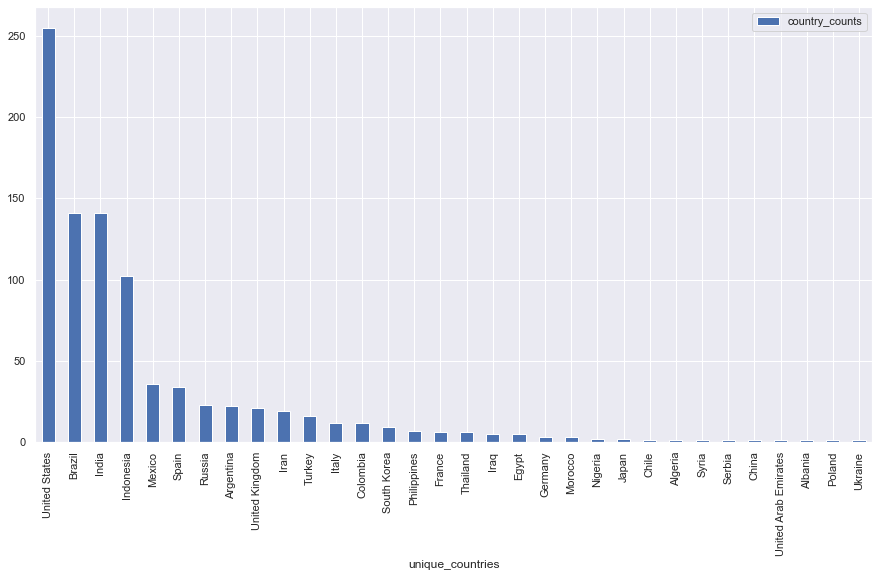

In [285]:
df_majority_country.plot.bar(x='unique_countries', y='country_counts', rot=90, figsize=(15,8))

In [286]:
df_instagram_category1 = df_instagram_imputed['category_1'].value_counts().rename_axis('unique_categories').reset_index(name='category_counts')
df_instagram_category1

,unique_categories,category_counts
0,Music,234
1,Cinema & Actors/actresses,214
2,Sports with a ball,113
3,Lifestyle,99
4,Shows,43
5,Modeling,36
6,Beauty,28
7,Humor & Fun & Happiness,18
8,Art/Artists,12
9,Family,11


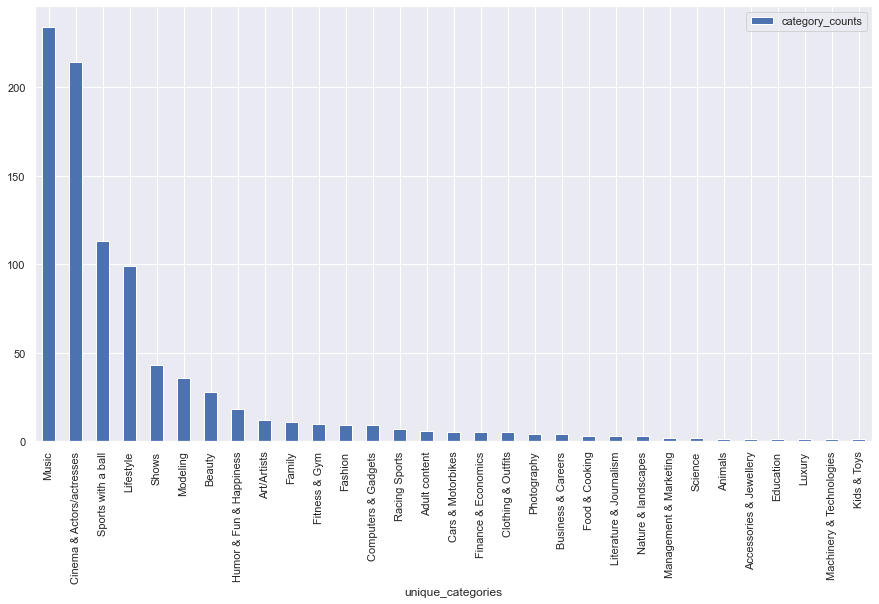

In [287]:
df_instagram_category1.plot.bar(x='unique_categories', y='category_counts', rot=90, figsize=(15,8))

In [288]:
# We recheck whether there is any NaN in our dataset. We ignore the missing data in insta_name column.

df_instagram_imputed.isna().any()

influencer_insta_name    False
insta_name                True
category_1               False
followers                False
majority_country         False
authentic_engagement     False
average_engagement       False
dtype: bool

# 3) Adding New Columns

In [289]:
df_instagram_numeric = df_instagram_imputed[['followers', 'authentic_engagement', 'average_engagement']]
df_instagram_numeric.head()

,followers,authentic_engagement,average_engagement
0,48500000.0,383100.0,637000.0
1,12700000.0,478000.0,542300.0
2,18800000.0,310800.0,377900.0
3,13500000.0,1100000.0,1400000.0
6,25000000.0,588600.0,749000.0


In [290]:
import seaborn as sns

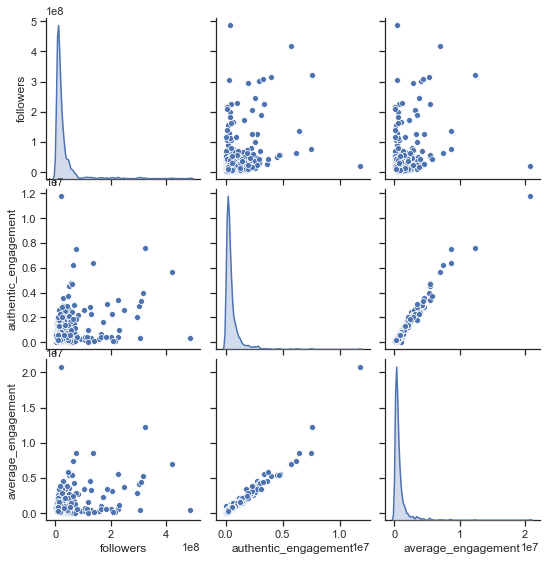

In [291]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_instagram_numeric, diag_kind="kde")

In [292]:
df_instagram_imputed[df_instagram_imputed['authentic_engagement'] >= df_instagram_imputed['average_engagement']]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement


In [293]:
df_instagram_imputed['authentic_engagement_rate'] = df_instagram_imputed['authentic_engagement']/df_instagram_imputed['followers']
df_instagram_imputed.head()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0,0.007899
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0,0.037638
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18800000.0,Russia,310800.0,377900.0,0.016532
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0,0.081481
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0,0.023544


In [294]:
df_instagram_imputed['average_engagement_rate'] = df_instagram_imputed['average_engagement']/df_instagram_imputed['followers']
df_instagram_imputed.head()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0,0.007899,0.013134
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0,0.037638,0.042701
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18800000.0,Russia,310800.0,377900.0,0.016532,0.020101
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0,0.081481,0.103704
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0,0.023544,0.029960


# 4) Detecting Outliers

Text(0, 0.5, 'Authentic Engagement Rate')

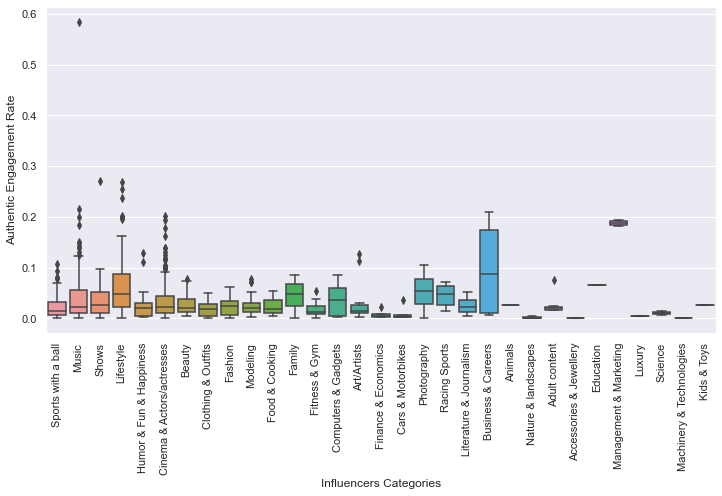

In [295]:
# Boxplots for authentic engagement rate.

df_authentic_engagement_rate = df_instagram_imputed[['category_1','authentic_engagement_rate']]

sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(y='authentic_engagement_rate', x='category_1', data=df_authentic_engagement_rate)
plt.xticks(rotation=90)
plt.xlabel('Influencers Categories')
plt.ylabel('Authentic Engagement Rate')

Text(0, 0.5, 'Average Engagement Rate')

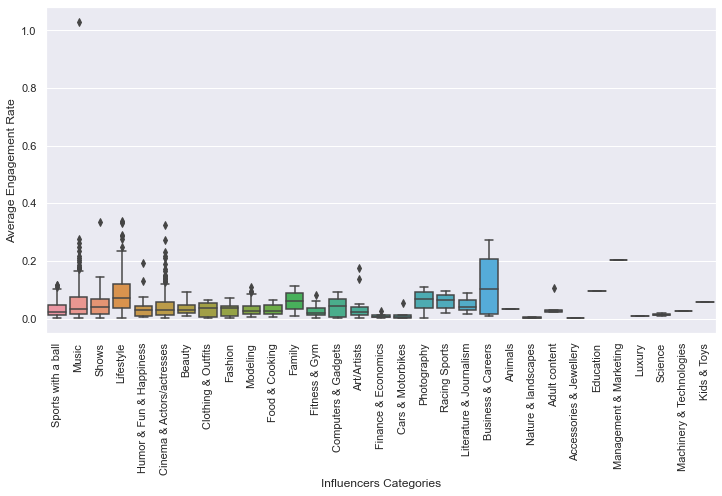

In [296]:
# Boxplots for average engagement rate.

df_average_engagement_rate = df_instagram_imputed[['category_1','average_engagement_rate']]

sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(y='average_engagement_rate', x='category_1', data=df_average_engagement_rate)
plt.xticks(rotation=90)
plt.xlabel('Influencers Categories')
plt.ylabel('Average Engagement Rate')

In [297]:
# The following influencer's average angagement number is worng (greater than the number of followers) which causes 
# occurance of an outlier which we see in the boxplot associated with music category w.r.t. average angagement 
# number.

df_instagram_imputed[(df_instagram_imputed['category_1'] == 'Music') & (df_instagram_imputed['average_engagement_rate'] > 1.0)]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate
968,xxxtentacion,MAKE OUT HILL,Music,20200000.0,United States,11800000.0,20800000.0,0.584158,1.029703


In [298]:
music_category = (df_instagram_imputed['category_1'] == 'Music')

followers_interval = (df_instagram_imputed['followers'] >= 20000000) & (df_instagram_imputed['followers'] <= 20500000)

df_instagram_imputed[(music_category) & (followers_interval)]

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate
117,bclsinclair,Bunga Citra Lestari,Music,20200000.0,Indonesia,153500.0,242600.0,0.007599,0.012010
639,mohamedramadanws,Mohamed Ramadan,Music,20100000.0,Egypt,93900.0,129900.0,0.004672,0.006463
764,realstraykids,Stray Kids,Music,20100000.0,Indonesia,1700000.0,2000000.0,0.084577,0.099502
968,xxxtentacion,MAKE OUT HILL,Music,20200000.0,United States,11800000.0,20800000.0,0.584158,1.029703


### Assumption

Looking at the data in the above table, we believe it is likely that the data entry in the average_engagement column for the influencer xxxtentacion was faulty; i.e. entering an extra zero. Therefore, we simply reduce one zero.

In [299]:
df_instagram_imputed.loc[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion', 'average_engagement'] = 2080000.0

In [300]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate
968,xxxtentacion,MAKE OUT HILL,Music,20200000.0,United States,11800000.0,2080000.0,0.584158,1.029703


In [301]:
# We update the average_engagement_rate accordingly.

desired_row = df_instagram_imputed.loc[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion']
new_value = desired_row['average_engagement']/desired_row['followers']
new_value

968    0.10297
dtype: float64

In [302]:
df_instagram_imputed.loc[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion', 'average_engagement_rate'] = new_value

In [303]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate
968,xxxtentacion,MAKE OUT HILL,Music,20200000.0,United States,11800000.0,2080000.0,0.584158,0.10297


In [304]:
# We also decided to make a similar change to the authentic_engagement value.

df_instagram_imputed.loc[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion', 'authentic_engagement'] = 1180000.0

In [305]:
# We also update the authentic_engagement_rate accordingly.

desired_row = df_instagram_imputed.loc[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion']
new_value = desired_row['authentic_engagement']/desired_row['followers']
new_value

968    0.058416
dtype: float64

In [306]:
df_instagram_imputed.loc[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion', 'authentic_engagement_rate'] = new_value

In [307]:
df_instagram_imputed[df_instagram_imputed['influencer_insta_name'] == 'xxxtentacion']

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate
968,xxxtentacion,MAKE OUT HILL,Music,20200000.0,United States,1180000.0,2080000.0,0.058416,0.10297


Text(0, 0.5, 'Engagement Rate')

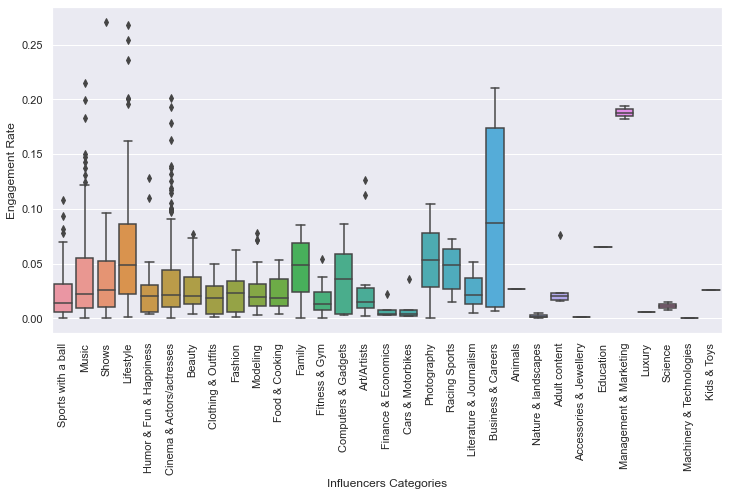

In [308]:
# We recheck the boxplots for average and authentic engagement rates of the music category.

df_authentic_engagement_rate = df_instagram_imputed[['category_1','authentic_engagement_rate']]

sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(y='authentic_engagement_rate', x='category_1', data=df_authentic_engagement_rate)
plt.xticks(rotation=90)
plt.xlabel('Influencers Categories')
plt.ylabel('Engagement Rate')

Text(0, 0.5, 'Average Rate')

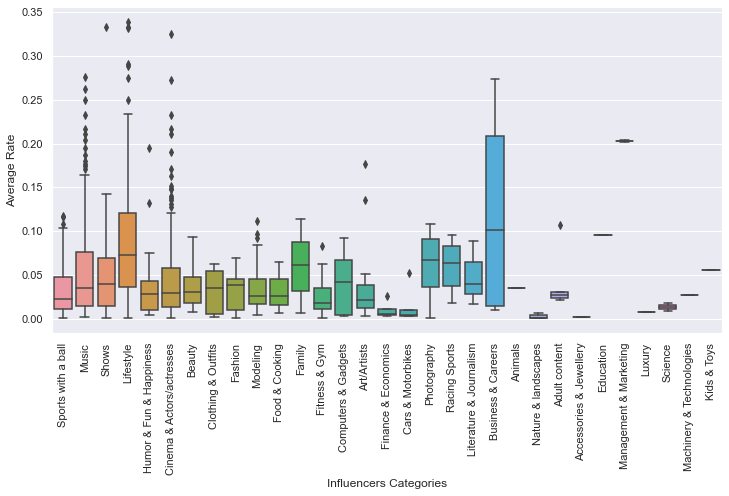

In [309]:
df_average_engagement_rate = df_instagram_imputed[['category_1','average_engagement_rate']]

sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(y='average_engagement_rate', x='category_1', data=df_average_engagement_rate)
plt.xticks(rotation=90)
plt.xlabel('Influencers Categories')
plt.ylabel('Average Rate')

# 5) Consolidating Categories

We decided to keep 4 categories of 1) Music, 2) Cinema & Actors/actresses, 3) Sports with a ball, and 4) Lifestyle, and consolidate the rest of categories into "Other", due to the lower number of data for the other categories.

In [310]:
df_instagram_consolidated = df_instagram_imputed.copy()

keep_categories = ['Music', 'Sports with a ball', 'Cinema & Actors/actresses', 'Lifestyle']

df_instagram_consolidated['category_1'].mask(~df_instagram_consolidated['category_1'].isin(keep_categories), 'Other', inplace=True)

df_instagram_consolidated.head()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0,0.007899,0.013134
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0,0.037638,0.042701
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Other,18800000.0,Russia,310800.0,377900.0,0.016532,0.020101
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0,0.081481,0.103704
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0,0.023544,0.029960


In [311]:
df_consolidated_category1 = df_instagram_consolidated['category_1'].value_counts().rename_axis('unique_categories').reset_index(name='category_counts')
df_consolidated_category1

,unique_categories,category_counts
0,Music,234
1,Other,231
2,Cinema & Actors/actresses,214
3,Sports with a ball,113
4,Lifestyle,99


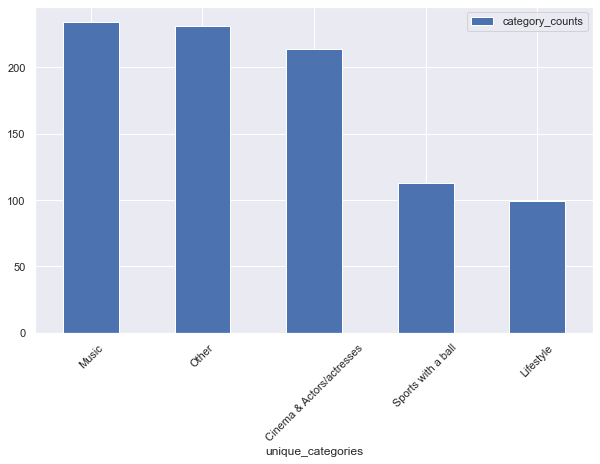

In [312]:
df_consolidated_category1.plot.bar(x='unique_categories', y='category_counts', rot=45, figsize=(10,6))

# 6) Correlations

In [313]:
df_instagram_consolidated.corr()

,followers,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate
followers,1.000000,0.402670,0.413661,-0.248969,-0.259620
authentic_engagement,0.402670,1.000000,0.985240,0.393811,0.357921
average_engagement,0.413661,0.985240,1.000000,0.376860,0.371580
authentic_engagement_rate,-0.248969,0.393811,0.376860,1.000000,0.960153
average_engagement_rate,-0.259620,0.357921,0.371580,0.960153,1.000000


In [314]:
# We create a new numeric column for category_1 column.

df_instagram_consolidated['category_numeric'] = pd.factorize(df_instagram_consolidated['category_1'])[0]
df_instagram_consolidated['category_numeric']

0      0
1      1
2      2
3      3
6      0
      ..
995    4
996    0
997    1
998    4
999    3
Name: category_numeric, Length: 891, dtype: int64

In [315]:
# We create a new numeric column for majority_country column.

df_instagram_consolidated['majority_country_numeric'] = pd.factorize(df_instagram_consolidated['majority_country'])[0]
df_instagram_consolidated['majority_country_numeric']

0       0
1       1
2       2
3       1
6       3
       ..
995     5
996     0
997     1
998     5
999    19
Name: majority_country_numeric, Length: 891, dtype: int64

In [316]:
df_instagram_consolidated.head()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate,category_numeric,majority_country_numeric
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0,0.007899,0.013134,0,0
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0,0.037638,0.042701,1,1
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Other,18800000.0,Russia,310800.0,377900.0,0.016532,0.020101,2,2
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0,0.081481,0.103704,3,1
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0,0.023544,0.029960,0,3


In [317]:
df_instagram_consolidated.corr()

,followers,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate,category_numeric,majority_country_numeric
followers,1.000000,0.402670,0.413661,-0.248969,-0.259620,-0.093747,-0.043657
authentic_engagement,0.402670,1.000000,0.985240,0.393811,0.357921,-0.002851,-0.123648
average_engagement,0.413661,0.985240,1.000000,0.376860,0.371580,-0.012244,-0.109487
authentic_engagement_rate,-0.248969,0.393811,0.376860,1.000000,0.960153,0.106018,-0.131040
average_engagement_rate,-0.259620,0.357921,0.371580,0.960153,1.000000,0.089390,-0.113231
category_numeric,-0.093747,-0.002851,-0.012244,0.106018,0.089390,1.000000,-0.056289
majority_country_numeric,-0.043657,-0.123648,-0.109487,-0.131040,-0.113231,-0.056289,1.000000


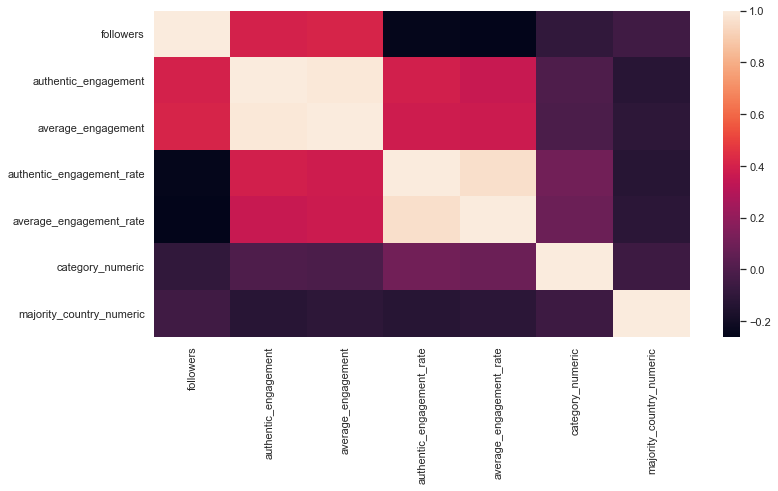

In [318]:
sns.heatmap(df_instagram_consolidated.corr());

# 7) Encoding

In [319]:
df_imputed = df_instagram_consolidated.copy()
df_imputed.head()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate,category_numeric,majority_country_numeric
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0,0.007899,0.013134,0,0
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0,0.037638,0.042701,1,1
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Other,18800000.0,Russia,310800.0,377900.0,0.016532,0.020101,2,2
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0,0.081481,0.103704,3,1
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0,0.023544,0.029960,0,3


In [320]:
df_country_encoded = pd.get_dummies(df_instagram_consolidated.majority_country , prefix='Country')
df_country_encoded.head()

,Country_Albania,Country_Algeria,Country_Argentina,Country_Brazil,Country_Chile,Country_China,Country_Colombia,Country_Egypt,Country_France,Country_Germany,...,Country_Serbia,Country_South Korea,Country_Spain,Country_Syria,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Merging dataframe and encoded countries:

In [321]:
pd.set_option('display.max_columns', None)

df_encoded = pd.concat([df_imputed, df_country_encoded], axis=1)
df_encoded.head()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate,category_numeric,majority_country_numeric,Country_Albania,Country_Algeria,Country_Argentina,Country_Brazil,Country_Chile,Country_China,Country_Colombia,Country_Egypt,Country_France,Country_Germany,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Italy,Country_Japan,Country_Mexico,Country_Morocco,Country_Nigeria,Country_Philippines,Country_Poland,Country_Russia,Country_Serbia,Country_South Korea,Country_Spain,Country_Syria,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0,0.007899,0.013134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0,0.037638,0.042701,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Other,18800000.0,Russia,310800.0,377900.0,0.016532,0.020101,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0,0.081481,0.103704,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0,0.023544,0.029960,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [322]:
df_category_encoded = pd.get_dummies(df_instagram_consolidated.category_1 , prefix='Category')
df_category_encoded.head()

,Category_Cinema & Actors/actresses,Category_Lifestyle,Category_Music,Category_Other,Category_Sports with a ball
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
6,0,0,0,0,1


### Merging dataframe and encoded categories:

In [323]:
df_encoded = pd.concat([df_encoded, df_category_encoded], axis=1)
df_encoded.head()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate,category_numeric,majority_country_numeric,Country_Albania,Country_Algeria,Country_Argentina,Country_Brazil,Country_Chile,Country_China,Country_Colombia,Country_Egypt,Country_France,Country_Germany,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Italy,Country_Japan,Country_Mexico,Country_Morocco,Country_Nigeria,Country_Philippines,Country_Poland,Country_Russia,Country_Serbia,Country_South Korea,Country_Spain,Country_Syria,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Category_Cinema & Actors/actresses,Category_Lifestyle,Category_Music,Category_Other,Category_Sports with a ball
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0,0.007899,0.013134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0,0.037638,0.042701,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Other,18800000.0,Russia,310800.0,377900.0,0.016532,0.020101,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0,0.081481,0.103704,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,_rl9,Robert Lewandowski,Sports with a ball,25000000.0,Poland,588600.0,749000.0,0.023544,0.029960,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [324]:
pd.reset_option('max_columns')

# 8) Normalization

In [325]:
df_normalized = df_imputed.copy()

In [326]:
df_normalized.loc[:, 'category_numeric'] = df_normalized['category_numeric']/df_normalized['category_numeric'].max()

In [327]:
df_normalized.loc[:, 'followers'] = df_normalized['followers']/df_normalized['followers'].max()

In [328]:
df_normalized.loc[:, 'majority_country_numeric'] = df_normalized['majority_country_numeric']/df_normalized['majority_country_numeric'].max()

# 9) Building Models

In [329]:
df_normalized.head()

,influencer_insta_name,insta_name,category_1,followers,majority_country,authentic_engagement,average_engagement,authentic_engagement_rate,average_engagement_rate,category_numeric,majority_country_numeric
0,433,433,Sports with a ball,0.099548,Spain,383100.0,637000.0,0.007899,0.013134,0.00,0.000000
1,__youngbae__,TAEYANG,Music,0.026067,Indonesia,478000.0,542300.0,0.037638,0.042701,0.25,0.032258
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Other,0.038588,Russia,310800.0,377900.0,0.016532,0.020101,0.50,0.064516
3,_imyour_joy,Joy,Lifestyle,0.027709,Indonesia,1100000.0,1400000.0,0.081481,0.103704,0.75,0.032258
6,_rl9,Robert Lewandowski,Sports with a ball,0.051314,Poland,588600.0,749000.0,0.023544,0.029960,0.00,0.096774


In [330]:
df_one_variable_regression_auth = df_normalized[['category_numeric',
                                                 'followers',
                                                 'authentic_engagement_rate',
                                                 'average_engagement_rate',
                                                 'majority_country_numeric']].copy()
df_one_variable_regression_auth

,category_numeric,followers,authentic_engagement_rate,average_engagement_rate,majority_country_numeric
0,0.00,0.099548,0.007899,0.013134,0.000000
1,0.25,0.026067,0.037638,0.042701,0.032258
2,0.50,0.038588,0.016532,0.020101,0.064516
3,0.75,0.027709,0.081481,0.103704,0.032258
6,0.00,0.051314,0.023544,0.029960,0.096774
...,...,...,...,...,...
995,1.00,0.279351,0.047024,0.063189,0.161290
996,0.00,0.064039,0.017500,0.023849,0.000000
997,0.25,0.028530,0.093525,0.115108,0.032258
998,1.00,0.016831,0.071098,0.107988,0.161290


## 9.0) Spliting Data

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
from sklearn import metrics

In [333]:
X = df_one_variable_regression_auth[['followers', 
                                     'authentic_engagement_rate', 
                                     'average_engagement_rate',
                                     'majority_country_numeric']]

In [334]:
y = df_one_variable_regression_auth['category_numeric']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [336]:
first_column = {'Metrics': ['MAE', 'MSE', 'RMSE']}
df_models_performance = pd.DataFrame(data=first_column)
df_models_performance

,Metrics
0,MAE
1,MSE
2,RMSE


## 9.1) Linear Regression

In [365]:
from sklearn.linear_model import LinearRegression

In [366]:
linear_regression = LinearRegression()

In [367]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [368]:
predictions = linear_regression.predict(X_test)

In [369]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.29318104107828613
MSE: 0.11923069538507695
RMSE: 0.3452979805690687


In [370]:
df_models_performance['Linear_Regression'] = [mae, mse, rmse]

## 9.2) Decision Tree

In [344]:
from sklearn.tree import DecisionTreeRegressor

In [345]:
from sklearn.model_selection import GridSearchCV

In [371]:
tree_params = {'splitter': ['best','random'],
               'max_depth' : [1, 2, 3, 4, 5],
               'min_samples_leaf': [1, 3, 5],
               'min_weight_fraction_leaf': [0.1, 0.3, 0.5],
               'max_features': ['auto', 'log2', 'sqrt', None],
               'max_leaf_nodes': [None, 10, 50, 90]}

In [372]:
decision_tree_regressor = DecisionTreeRegressor(random_state = 42)

In [373]:
selected_decision_tree_regressor = GridSearchCV(decision_tree_regressor, 
                                                param_grid=tree_params,
                                                scoring='neg_mean_squared_error',
                                                cv=3,
                                                verbose=2)

In [374]:
selected_decision_tree_regressor.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_feat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weigh

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_frac

[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fr

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fr

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_frac

[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weigh

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=None, min_samples_lea

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_w

[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_wei

[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=None, min_samples_l

[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_w

[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=1, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_wei

[CV]  max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=None, min_samples_l

[CV]  max_depth=2, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_wei

[CV]  max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, min_weigh

[CV]  max_depth=2, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, min_w

[CV]  max_depth=2, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=10, min_samples_leaf=1, min_weight_

[CV]  max_depth=2, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=50, min_samples_leaf=3, min_weight_

[CV]  max_depth=2, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=2, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=log2, max_leaf_nodes=90, min_samples_leaf=5, min_weight_frac

[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fr

[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=3, min_wei

[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=2, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fr

[CV]  max_depth=2, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_wei

[CV]  max_depth=2, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=2, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=2, max_features=None, max_leaf_nodes=50, min_samples_leaf=5, min_weigh

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_wei

[CV]  max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, min_weight_frac

[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=

[CV]  max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fr

[CV]  max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=log2, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_w

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=None, min_samples_lea

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_wei

[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=5, min_weight_

[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=None, min_samples_lea

[CV]  max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_wei

[CV]  max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=50, min_samples_leaf=3, min_wei

[CV]  max_depth=3, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=3, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=3, max_features=None, max_leaf_nodes=90, min_samples_leaf=5, min_wei

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=None, min_samples_l

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, min_wei

[CV]  max_depth=4, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, min_weight_frac

[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=None, min_samples_l

[CV]  max_depth=4, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=50, min_samples_leaf=1, min_wei

[CV]  max_depth=4, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=log2, max_leaf_nodes=90, min_samples_leaf=3, min_w

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=None, min_sampl

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=50, min_samples_leaf=1, min_w

[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=4, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=3, min_weight_

[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=None, min_samples_l

[CV]  max_depth=4, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_frac

[CV]  max_depth=4, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=4, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=4, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fr

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_l

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fr

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_l

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=10, min_samples_leaf=5, min_wei

[CV]  max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=log2, max_leaf_nodes=90, min_samples_leaf=1, min_weight_frac

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=5, min_w

[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.3, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best 
[CV]  max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.5, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=sqrt, max_leaf_nodes=90, min_samples_leaf=1, min_weight_

[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.3, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=None, min_samples

[CV]  max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.5, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=10, min_samples_leaf=5, min_weight_frac

[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, total=   0.0s
[CV] max_depth=5, max_features=None, max_leaf_nodes=90, min_samples_leaf=1, min_weigh

[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:   12.5s finished


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 50, 90],
                         'min_samples_leaf': [1, 3, 5],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [375]:
selected_decision_tree_regressor.best_params_

{'max_depth': 2, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}

In [376]:
selected_decision_tree_regressor.best_score_

-0.10927288988861332

In [377]:
tuned_decision_tree = DecisionTreeRegressor(max_depth=2,
                                            max_features='log2',
                                            max_leaf_nodes=None,
                                            min_samples_leaf=1,
                                            min_weight_fraction_leaf=0.1,
                                            splitter='random')

In [378]:
tuned_decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='log2',
                      min_weight_fraction_leaf=0.1, splitter='random')

In [379]:
tuned_pred = tuned_decision_tree.predict(X_test)

In [380]:
mae = metrics.mean_absolute_error(y_test, tuned_pred)
mse = metrics.mean_squared_error(y_test, tuned_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, tuned_pred))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.30064699376491744
MSE: 0.12138320643411325
RMSE: 0.34840092771706743


In [430]:
df_models_performance['Decision_Tree'] = [mae, mse, rmse]

## 9.3) Random Forest

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
from sklearn.model_selection import RandomizedSearchCV

### Random Hyperparameter Grid

In [382]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [383]:
# Create the random grid
random_params = {'n_estimators': n_estimators,
                 'max_features': max_features,
                 'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'bootstrap': bootstrap}

In [384]:
base_forest_regressor = RandomForestRegressor()

In [385]:
random_forest_regressor = RandomizedSearchCV(estimator = base_forest_regressor, 
                                             param_distributions = random_params, 
                                             n_iter = 100, 
                                             cv = 3, 
                                             verbose=1, 
                                             random_state=42, 
                                             n_jobs = -1)

In [386]:
random_forest_regressor.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [387]:
random_forest_regressor.best_params_

{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}

In [388]:
selected_decision_tree_regressor.best_score_

-0.10927288988861332

In [389]:
tuned_random_forest = RandomForestRegressor(n_estimators=1600,
                                            min_samples_split=5,
                                            min_samples_leaf=1,
                                            max_features='auto',
                                            max_depth=10,
                                            bootstrap=True)

In [390]:
tuned_random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=1600)

In [391]:
tuned_pred = tuned_random_forest.predict(X_test)

In [392]:
mae = metrics.mean_absolute_error(y_test, tuned_pred)
mse = metrics.mean_squared_error(y_test, tuned_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, tuned_pred))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.2818264735723094
MSE: 0.11558248760859371
RMSE: 0.33997424550779387


In [429]:
df_models_performance['Random_Forest_Rendom_Grid'] = [mae, mse, rmse]

### Grid Search with Cross Validation

In [394]:
# We create the parameter grid based on the results of random search 
grid_params = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15, 20],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [1200, 1400, 1600, 1500]
}

In [395]:
base_forest_regressor = RandomForestRegressor()

In [396]:
grid_random_forest_regressor = GridSearchCV(estimator = base_forest_regressor, 
                                            param_grid = grid_params, 
                                            cv = 3, 
                                            n_jobs = -1, 
                                            verbose = 2)

In [397]:
grid_random_forest_regressor.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  5.3min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [1200, 1400, 1600, 1500]},
             verbose=2)

In [398]:
grid_random_forest_regressor.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1600}

In [399]:
grid_random_forest_regressor.best_estimator_

RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=3,
                      n_estimators=1600)

In [400]:
tuned_grid_random_forest = RandomForestRegressor(n_estimators=1600,
                                                 min_samples_split=3,
                                                 min_samples_leaf=1,
                                                 max_features=4,
                                                 max_depth=5,
                                                 bootstrap=True)

In [401]:
tuned_grid_random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=3,
                      n_estimators=1600)

In [402]:
tuned_grid_pred = tuned_grid_random_forest.predict(X_test)

In [403]:
mae = metrics.mean_absolute_error(y_test, tuned_grid_pred)
mse = metrics.mean_squared_error(y_test, tuned_grid_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, tuned_grid_pred))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.27995262593562614
MSE: 0.11201732452423034
RMSE: 0.33468989307152724


In [428]:
df_models_performance['Random_Forest_Grid_Search'] = [mae, mse, rmse]

## 9.4) k-Nearest-Neighbor

In [406]:
from sklearn.neighbors import KNeighborsRegressor

In [407]:
grid_params = {
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
    'leaf_size': np.arange(1, 50),
    'p': [0.5, 1, 2, 3]
}

In [408]:
base_knn_regressor = KNeighborsRegressor()

In [409]:
grid_knn_regressor = GridSearchCV(base_knn_regressor, 
                                  grid_params, 
                                  cv=10,
                                  n_jobs = -1,
                                  verbose = 2)

In [410]:
grid_knn_regressor.fit(X_train, y_train)

Fitting 10 folds for each of 1568 candidates, totalling 15680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 11040 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 15680 out of 15680 | elapsed:    6.6s finished


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': [0.5, 1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [411]:
grid_knn_regressor.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 1, 'p': 2, 'weights': 'uniform'}

In [412]:
grid_knn_regressor.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1)

In [413]:
tuned_knn_regressor = KNeighborsRegressor(algorithm='ball_tree', leaf_size=1)

In [414]:
tuned_knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1)

In [415]:
tuned_pred = tuned_knn_regressor.predict(X_test)

In [416]:
mae = metrics.mean_absolute_error(y_test, tuned_pred)
mse = metrics.mean_squared_error(y_test, tuned_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, tuned_pred))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.2941340782122905
MSE: 0.13062849162011173
RMSE: 0.36142563774601233


In [427]:
df_models_performance['kNN'] = [mae, mse, rmse]

## 9.5) Support Vector Regression

In [191]:
from sklearn import svm

In [201]:
grid_params = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [3, 5, 7],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0],
    'C': [0.1, 5.0, 50.0],
    'epsilon': [0.05, 0.1, 0.15],
    'C': [1.0, 1.5, 2.0],
    'shrinking': [True, False],
}

In [202]:
base_svm_regressor = svm.SVR()

In [203]:
grid_svm_regressor = GridSearchCV(base_svm_regressor, 
                                  grid_params, 
                                  cv=3,
                                  n_jobs = -1,
                                  verbose = 2)

In [204]:
grid_svm_regressor.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 231 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 767 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1457 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 1912 tasks      | elapsed: 43.1min
[Parallel(n_jobs=-1)]: Done 2449 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 2916 out of 2916 | elapsed: 99.2min finished


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2.0], 'coef0': [0.0, 0.5, 1.0],
                         'degree': [3, 5, 7], 'epsilon': [0.05, 0.1, 0.15],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             verbose=2)

In [206]:
grid_svm_regressor.best_params_

{'C': 2.0, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.15, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

In [207]:
grid_svm_regressor.best_estimator_

SVR(C=2.0, epsilon=0.15)

In [418]:
tuned_svm_regressor = svm.SVR(C=2.0, epsilon=0.15)

In [419]:
tuned_svm_regressor.fit(X_train, y_train)

SVR(C=2.0, epsilon=0.15)

In [420]:
tuned_pred = tuned_svm_regressor.predict(X_test)

In [421]:
mae = metrics.mean_absolute_error(y_test, tuned_pred)
mse = metrics.mean_squared_error(y_test, tuned_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, tuned_pred))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 0.29227080544954026
MSE: 0.11245640633284074
RMSE: 0.33534520472617574


In [423]:
df_models_performance['SVM'] = [mae, mse, rmse]

## 9.6) Performance Comparison

In [426]:
df_models_performance

,Metrics,Linear_Regression,Decision_Tree,Random_Forest_Rendom_Grid,Random_Forest_Grid_Search,kNN,SVM
0,MAE,0.293181,0.300647,0.281826,0.279953,0.294134,0.292271
1,MSE,0.119231,0.121383,0.115582,0.112017,0.130628,0.112456
2,RMSE,0.345298,0.348401,0.339974,0.334690,0.361426,0.335345
